In [20]:
import sys
import os
from os import path
import glob
import json
import re

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# Local imports (hacky approach)
if ".." not in sys.path: sys.path.append("..")
from saccade_config import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
boc = BrainObservatoryCache(manifest_file=BRAIN_OBSERVATORY_CACHE_MANIFEST_FILE)

In [3]:
# Get all experiments with eye tracking
all_experiments = [
    exp for exp in boc.get_ophys_experiments()
    if not exp["fail_eye_tracking"]
]
print(f"{len(all_experiments)} total experiments with eye tracking")

837 total experiments with eye tracking


In [4]:
# Load the first experiment
exp_id = all_experiments[0]["id"]
exp_data = boc.get_ophys_experiment_data(exp_id)

In [5]:
# get_metadata() returns various experiment data for the session
exp_data.get_metadata()

{'sex': 'female',
 'targeted_structure': 'VISpm',
 'ophys_experiment_id': 649409874,
 'experiment_container_id': 646959440,
 'excitation_lambda': '910 nanometers',
 'indicator': 'GCaMP6f',
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'session_start_time': datetime.datetime(2017, 11, 20, 13, 13, 28),
 'session_type': 'three_session_A',
 'specimen_name': 'Vip-IRES-Cre;Ai148-350249',
 'cre_line': 'Vip-IRES-Cre/wt',
 'imaging_depth_um': 175,
 'age_days': 101,
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.5',
 'pipeline_version': '3.0'}

In [17]:
eye_tracking = boc.get_eye_tracking(exp_id)
eye_tracking.shape

(118996, 5)

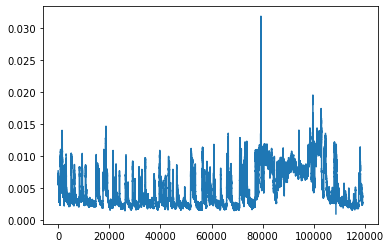

In [33]:
plt.plot(eye_tracking[:, 2])